In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  
import pandas as pd
import nltk
from textblob import TextBlob
import spacy
import matplotlib.pyplot as plt
import operator
import seaborn as sns
import warnings
import re
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("critics_review.csv")

In [3]:
df.head(5)

,movie_name,name,review,rating,date
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",na,"June 6, 2021"
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021"
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,na,"May 12, 2021"
3,zack_snyders_justice_league,Leigh Paatsch,A rip-roaring superhero action picture in its ...,3.5/5,"May 12, 2021"
4,zack_snyders_justice_league,Matt Hudson,An upgrade to be sure and one that will deligh...,7.5/10,"April 29, 2021"


In [4]:
na = df[df["rating"]=="na"]

In [5]:
rev = df["review"]

In [6]:
t = rev[1]
t

"The current DC Extended Universe can be a bit messy at times, but this is proof that when it's backed by the right minds, then it can be a hell of a show."

In [7]:
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words
all_stopwords.remove('not')
def remove_mystopwords(sentence):
    tokens = sentence.split(" ")
    tokens_filtered= [word for word in tokens if not word in all_stopwords]
    return (" ").join(tokens_filtered)

In [8]:
cleantext = re.sub("[ ,.:]", " ", t)
cleantext = re.sub("[0-9]", " ", cleantext)
cleantext = re.sub("[[]", " ", cleantext)
cleantext = re.sub("[]]", " ", cleantext)
cleantext = re.sub("['']", " ", cleantext)
cleantext = re.sub("[)(]", " ", cleantext)
cleantext = re.sub("@\\w+", " ", cleantext)
cleantext = re.sub("#\\w+", " ", cleantext)
cleantext = re.sub("[,' %]", " ", cleantext)
cleantext = re.sub("[//]", " ", cleantext)
cleantext = re.sub("[&]", " ", cleantext)
cleantext = re.sub("[;]", " ", cleantext)
cleantext = re.sub("[$]", " ", cleantext)

In [9]:
data = cleantext.lower()

In [10]:
clean_r = pd.DataFrame(columns=["clean_text"])
df = pd.concat([df,clean_r],axis=1)

In [11]:
df.head()

,movie_name,name,review,rating,date,clean_text
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",na,"June 6, 2021",NaN
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",NaN
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,na,"May 12, 2021",NaN
3,zack_snyders_justice_league,Leigh Paatsch,A rip-roaring superhero action picture in its ...,3.5/5,"May 12, 2021",NaN
4,zack_snyders_justice_league,Matt Hudson,An upgrade to be sure and one that will deligh...,7.5/10,"April 29, 2021",NaN


In [12]:
j = 0
for i in df["review"]:
    cleantext = re.sub("[ ,.:]", " ", i)
    cleantext = re.sub("[0-9]", " ", cleantext)
    cleantext = re.sub("[[]", " ", cleantext)
    cleantext = re.sub("[]]", " ", cleantext)
    cleantext = re.sub("['']", " ", cleantext)
    cleantext = re.sub("[)(]", " ", cleantext)
    cleantext = re.sub("@\\w+", " ", cleantext)
    cleantext = re.sub("#\\w+", " ", cleantext)
    cleantext = re.sub("[,' %]", " ", cleantext)
    cleantext = re.sub("[//]", " ", cleantext)
    cleantext = re.sub("[&]", " ", cleantext)
    cleantext = re.sub("[;]", " ", cleantext)
    cleantext = re.sub("[$]", " ", cleantext)
    final = cleantext.lower()
    filtered_text = remove_mystopwords(final)
    df["clean_text"][j] = filtered_text
    j+=1

In [13]:
df.head()

,movie_name,name,review,rating,date,clean_text
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",na,"June 6, 2021",ultimately exists reason whirl
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",current dc extended universe bit messy times ...
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,na,"May 12, 2021",zack snyder s justice league unquestionably be...
3,zack_snyders_justice_league,Leigh Paatsch,A rip-roaring superhero action picture in its ...,3.5/5,"May 12, 2021",rip-roaring superhero action picture right ju...
4,zack_snyders_justice_league,Matt Hudson,An upgrade to be sure and one that will deligh...,7.5/10,"April 29, 2021",upgrade sure delight snyder fans dc fans com...


In [14]:
jo = df["clean_text"][21]

In [15]:
jo

'pointless best describes movie '

In [16]:
jo.splitlines()

['pointless best describes movie ']

In [17]:
sid_obj = SentimentIntensityAnalyzer()
bon = sid_obj.polarity_scores(jo)
bon

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}

In [18]:
bon["neu"]

0.417

In [19]:
if bon["neg"]>bon["pos"]>bon["neu"]:
    print("yes")
elif bon["neg"]<bon["pos"]<bon["neu"]:
    print("yup")
elif bon["neg"]<bon["pos"]>bon["neu"]:
    print("yoooo")

yoooo


In [20]:
senti = pd.DataFrame(columns=["sentiment"])
df = pd.concat([df,senti],axis=1)

In [21]:
df.head(2)

,movie_name,name,review,rating,date,clean_text,sentiment
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",na,"June 6, 2021",ultimately exists reason whirl,NaN
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",current dc extended universe bit messy times ...,NaN


In [22]:
j = 0
for rev in df["clean_text"]:
    pol = sid_obj.polarity_scores(rev)
    if pol["neg"]>0.2:
        df["sentiment"][j] = "negative"
    elif pol["compound"] == 0:
        df["sentiment"][j] = "neutral"
    else:
        df["sentiment"][j] = "positive"
    j+=1

In [23]:
df.head()

,movie_name,name,review,rating,date,clean_text,sentiment
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",na,"June 6, 2021",ultimately exists reason whirl,neutral
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",current dc extended universe bit messy times ...,negative
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,na,"May 12, 2021",zack snyder s justice league unquestionably be...,positive
3,zack_snyders_justice_league,Leigh Paatsch,A rip-roaring superhero action picture in its ...,3.5/5,"May 12, 2021",rip-roaring superhero action picture right ju...,neutral
4,zack_snyders_justice_league,Matt Hudson,An upgrade to be sure and one that will deligh...,7.5/10,"April 29, 2021",upgrade sure delight snyder fans dc fans com...,positive


In [24]:
df["sentiment"].value_counts()

positive    1085
negative     306
neutral      141
Name: sentiment, dtype: int64

In [25]:
new= df[df["sentiment"]=="negative"]

In [26]:
new

,movie_name,name,review,rating,date,clean_text,sentiment
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",current dc extended universe bit messy times ...,negative
7,zack_snyders_justice_league,Jeffrey M. Anderson,"Ultimately, there was nothing for me in this l...",2.5/4,"April 10, 2021",ultimately longer cut didn t shorter cut,negative
8,zack_snyders_justice_league,Alejandro Turdo,The Snyder Cut turns a terrible movie into a d...,8/10,"April 8, 2021",snyder cut turns terrible movie decent simply...,negative
14,zack_snyders_justice_league,Julio Fernando Navas,Even more unbearable than the theatrical cut. ...,1.5/,"April 2, 2021",unbearable theatrical cut review spanish,negative
17,zack_snyders_justice_league,Robert Roten,Zack Snyder's new director's cut of his 2017 f...,B,"April 1, 2021",zack snyder s new director s cut film twi...,negative
...,...,...,...,...,...,...,...
1518,john_wick_chapter_3_parabellum,Chris Nashawaty,I don't mean to give the impression that John ...,A-,"May 10, 2019",don t mean impression john wick grander gorg...,negative
1520,john_wick_chapter_3_parabellum,Jim Vejvoda,The action is bloody and over-the-top and the ...,8.5/10,"May 10, 2019",action bloody over-the-top emotional throughli...,negative
1522,john_wick_chapter_3_parabellum,Brian Truitt,It's almost a karmic answer to everything else...,3/4,"May 10, 2019",s karmic answer action-movie genre s usually ...,negative
1523,john_wick_chapter_3_parabellum,John DeFore,An epic of choreographed mayhem that expands t...,na,"May 10, 2019",epic choreographed mayhem expands wickiverse p...,negative


In [27]:
new["review"][1524]

'The marriage of brutal hand-to-hand combat and impossibly precise gunplay have been franchise staples, and John Wick: Chapter 3 takes these elements to incredible heights with some of the most flat-out insane action choreography ever seen.'

In [28]:
df.head(3)

,movie_name,name,review,rating,date,clean_text,sentiment
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",na,"June 6, 2021",ultimately exists reason whirl,neutral
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",current dc extended universe bit messy times ...,negative
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,na,"May 12, 2021",zack snyder s justice league unquestionably be...,positive


In [29]:
df1 = df.replace({"na":"unrated"})

In [30]:
df1.head(3)

,movie_name,name,review,rating,date,clean_text,sentiment
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",unrated,"June 6, 2021",ultimately exists reason whirl,neutral
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",current dc extended universe bit messy times ...,negative
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,unrated,"May 12, 2021",zack snyder s justice league unquestionably be...,positive


In [31]:
x =df1["rating"][1].split("/")

In [32]:
len(x)

2

In [33]:
if x[1] == "5":
    c = int(x[0])*2
    print(c)
else:
    pass

6


In [34]:
sentim = pd.DataFrame(columns=["rating_out_of_10"])
df1 = pd.concat([df1,sentim],axis=1)

In [35]:
j = 0 
for rating in df1["rating"]:
    x = rating.split("/")
    if len(x) >= 2:
        if x[1] == "5":
            c = float(x[0])*2
            df1["rating_out_of_10"][j] = c
        else:
            df1["rating_out_of_10"][j] = x[0]
    else:
        df1["rating_out_of_10"][j] = x[0]
    j+=1

In [36]:
df1.head()

,movie_name,name,review,rating,date,clean_text,sentiment,rating_out_of_10
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",unrated,"June 6, 2021",ultimately exists reason whirl,neutral,unrated
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",current dc extended universe bit messy times ...,negative,6
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,unrated,"May 12, 2021",zack snyder s justice league unquestionably be...,positive,unrated
3,zack_snyders_justice_league,Leigh Paatsch,A rip-roaring superhero action picture in its ...,3.5/5,"May 12, 2021",rip-roaring superhero action picture right ju...,neutral,7
4,zack_snyders_justice_league,Matt Hudson,An upgrade to be sure and one that will deligh...,7.5/10,"April 29, 2021",upgrade sure delight snyder fans dc fans com...,positive,7.5


In [37]:
df1["rating_out_of_10"].value_counts()

unrated    454
8.0        186
6.0         83
10.0        73
3           69
          ... 
6.5          1
78           1
8.7          1
8.8          1
D+           1
Name: rating_out_of_10, Length: 67, dtype: int64

In [38]:
top = df1[df1["rating_out_of_10"]==10]

In [39]:
top["sentiment"].value_counts()

positive    58
negative     8
neutral      7
Name: sentiment, dtype: int64

In [40]:
df1["rating_out_of_10"].dtype

dtype('O')

In [41]:
df1.head()

,movie_name,name,review,rating,date,clean_text,sentiment,rating_out_of_10
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",unrated,"June 6, 2021",ultimately exists reason whirl,neutral,unrated
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",current dc extended universe bit messy times ...,negative,6
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,unrated,"May 12, 2021",zack snyder s justice league unquestionably be...,positive,unrated
3,zack_snyders_justice_league,Leigh Paatsch,A rip-roaring superhero action picture in its ...,3.5/5,"May 12, 2021",rip-roaring superhero action picture right ju...,neutral,7
4,zack_snyders_justice_league,Matt Hudson,An upgrade to be sure and one that will deligh...,7.5/10,"April 29, 2021",upgrade sure delight snyder fans dc fans com...,positive,7.5


In [42]:
df1["rating_out_of_10"].replace({"unrated":0},inplace=True)

In [43]:
df1.head()

,movie_name,name,review,rating,date,clean_text,sentiment,rating_out_of_10
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",unrated,"June 6, 2021",ultimately exists reason whirl,neutral,0
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",current dc extended universe bit messy times ...,negative,6
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,unrated,"May 12, 2021",zack snyder s justice league unquestionably be...,positive,0
3,zack_snyders_justice_league,Leigh Paatsch,A rip-roaring superhero action picture in its ...,3.5/5,"May 12, 2021",rip-roaring superhero action picture right ju...,neutral,7
4,zack_snyders_justice_league,Matt Hudson,An upgrade to be sure and one that will deligh...,7.5/10,"April 29, 2021",upgrade sure delight snyder fans dc fans com...,positive,7.5


In [44]:
df1["rating_out_of_10"].replace({"C-":0,"B":0,"B+":0,"A+":0,"A-":0,"D-":0,"C":0,"B-":0,"Matinee":0,"A":0,"D+":0,"C+":0,"D":0},inplace=True)

In [45]:
df1[df1["rating_out_of_10"]=="78"]

,movie_name,name,review,rating,date,clean_text,sentiment,rating_out_of_10
595,avengers_endgame,Abby Olcese,"Despite a few shortcomings, Avengers: Endgame ...",78/100,"April 25, 2019",despite shortcomings avengers endgame affect...,positive,78


In [46]:
df1["rating_out_of_10"].replace({"B-minus":0,"90":9.0,"78":7.8,"B-+":0,"83":8.3,"B-plus":0,"87":8.7,"16":1.6,"88":8.8,"18":1.8,"14.5":7.5,"Big":0},inplace=True)

In [47]:
df1.dtypes

movie_name          object
name                object
review              object
rating              object
date                object
clean_text          object
sentiment           object
rating_out_of_10    object
dtype: object

In [48]:
df1 = df1.astype({"rating_out_of_10":float})

In [49]:
df1.head()

,movie_name,name,review,rating,date,clean_text,sentiment,rating_out_of_10
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",unrated,"June 6, 2021",ultimately exists reason whirl,neutral,0.0
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",current dc extended universe bit messy times ...,negative,6.0
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,unrated,"May 12, 2021",zack snyder s justice league unquestionably be...,positive,0.0
3,zack_snyders_justice_league,Leigh Paatsch,A rip-roaring superhero action picture in its ...,3.5/5,"May 12, 2021",rip-roaring superhero action picture right ju...,neutral,7.0
4,zack_snyders_justice_league,Matt Hudson,An upgrade to be sure and one that will deligh...,7.5/10,"April 29, 2021",upgrade sure delight snyder fans dc fans com...,positive,7.5


In [50]:
j=0
for rating in df1["rating_out_of_10"]:
    if rating > 7.0:
        df1["sentiment"][j] = "positive"
    else:
        pass
    j+=1

In [51]:
df1.head()

,movie_name,name,review,rating,date,clean_text,sentiment,rating_out_of_10
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",unrated,"June 6, 2021",ultimately exists reason whirl,neutral,0.0
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",current dc extended universe bit messy times ...,negative,6.0
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,unrated,"May 12, 2021",zack snyder s justice league unquestionably be...,positive,0.0
3,zack_snyders_justice_league,Leigh Paatsch,A rip-roaring superhero action picture in its ...,3.5/5,"May 12, 2021",rip-roaring superhero action picture right ju...,neutral,7.0
4,zack_snyders_justice_league,Matt Hudson,An upgrade to be sure and one that will deligh...,7.5/10,"April 29, 2021",upgrade sure delight snyder fans dc fans com...,positive,7.5


In [52]:
r_s = pd.DataFrame(columns=["rating_sentiment"])
df1 = pd.concat([df1,r_s],axis=1)

In [53]:
j = 0 
length = len(df1["rating_out_of_10"])

for i in range (0,length):
    if df1["rating_out_of_10"][i] >= 8.0 :
        df1["rating_sentiment"][j] = "Excellent"
        
    elif df1["rating_out_of_10"][i] >= 6.0 :
        df1["rating_sentiment"][j] = "Good"
        
    elif df1["rating_out_of_10"][i] >=4.0 :
        df1["rating_sentiment"][j] = "Average"
        
    elif df1["rating_out_of_10"][i] == 0.0 :
        df1["rating_sentiment"][j] = "unrated"
        
    elif df1["rating_out_of_10"][i] <= 3.0 :
        df1["rating_sentiment"][j] = "Poor"    
    j+=1

In [54]:
df1.head()

,movie_name,name,review,rating,date,clean_text,sentiment,rating_out_of_10,rating_sentiment
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...",unrated,"June 6, 2021",ultimately exists reason whirl,neutral,0.0,unrated
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,3/5,"May 20, 2021",current dc extended universe bit messy times ...,negative,6.0,Good
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,unrated,"May 12, 2021",zack snyder s justice league unquestionably be...,positive,0.0,unrated
3,zack_snyders_justice_league,Leigh Paatsch,A rip-roaring superhero action picture in its ...,3.5/5,"May 12, 2021",rip-roaring superhero action picture right ju...,neutral,7.0,Good
4,zack_snyders_justice_league,Matt Hudson,An upgrade to be sure and one that will deligh...,7.5/10,"April 29, 2021",upgrade sure delight snyder fans dc fans com...,positive,7.5,Good


In [55]:
df1["rating_sentiment"].value_counts()

unrated      615
Excellent    420
Good         215
Poor         140
Average       99
Name: rating_sentiment, dtype: int64

In [56]:
df2 = df1.drop(["rating","clean_text"],axis=1)

In [57]:
df2.head()

,movie_name,name,review,date,sentiment,rating_out_of_10,rating_sentiment
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...","June 6, 2021",neutral,0.0,unrated
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,"May 20, 2021",negative,6.0,Good
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,"May 12, 2021",positive,0.0,unrated
3,zack_snyders_justice_league,Leigh Paatsch,A rip-roaring superhero action picture in its ...,"May 12, 2021",neutral,7.0,Good
4,zack_snyders_justice_league,Matt Hudson,An upgrade to be sure and one that will deligh...,"April 29, 2021",positive,7.5,Good


In [58]:
word = df1["clean_text"][1]

In [59]:
word

'current dc extended universe bit messy times  proof s backed right minds  hell '

In [60]:
token = nltk.word_tokenize(word)

In [61]:
df1["clean_text"][0]

'ultimately  exists reason whirl '

In [62]:
to = len(df1["clean_text"])

In [63]:
adjectives = []
for i in range(0,to):
    sentence = df["clean_text"][i]
    token = nltk.word_tokenize(sentence)
    for i in token:
        x = nltk.pos_tag([i])
        if (x[0][1] == "JJ" or x[0][1] == "JJS" ) :
            adjectives.append(i)

In [64]:
dict1 = {}
for i in adjectives:
    dict1[i] = adjectives.count(i)
    sorted_d = dict(sorted(dict1.items(), key=operator.itemgetter(1), reverse=True))
    final = []
    for i in sorted_d.items():
        final.append(i[0])

In [65]:
attribute_list = final[:15]
attribute_list = [i.lower() for i in attribute_list if (3 <= len(i) <= 12)]

In [66]:
attribute_list

['spanish',
 'best',
 'good',
 'cinematic',
 'emotional',
 'new',
 'great',
 'big',
 'ambitious',
 'real',
 'little',
 'narrative',
 'hard',
 'visual',
 'original']

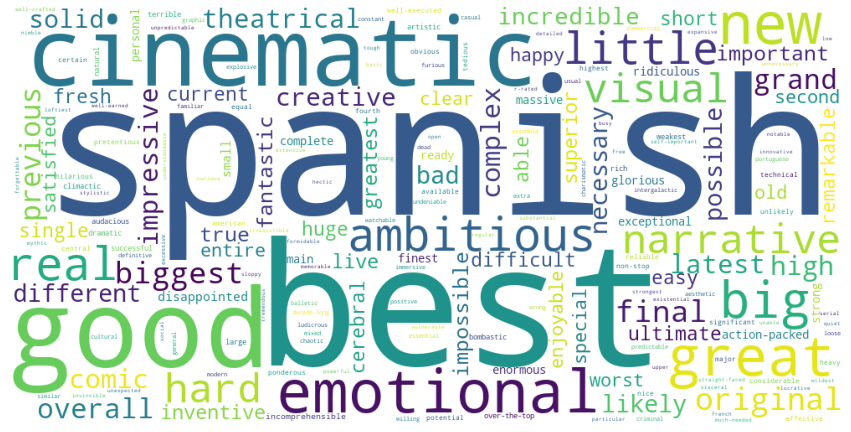

In [67]:
wordcloud = WordCloud(background_color='white',width = 1000, height = 500).generate_from_frequencies(dict1)

plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)

In [68]:
dfnew = df2.groupby("sentiment").agg('count')


<AxesSubplot:>

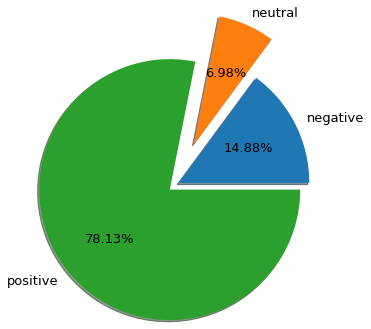

In [69]:
explode = [0.03,0.5,0.1] # To slice the perticuler section
textprops = {"fontsize":13} # Font size of text in pie chart
 
dfnew["review"].plot.pie(radius = 1.5,autopct = "%0.2f%%",shadow = True,explode = explode,textprops =textprops,legend=False,ylabel="")

In [70]:
dfnew1 = df2.groupby("rating_sentiment").agg('count')

<AxesSubplot:>

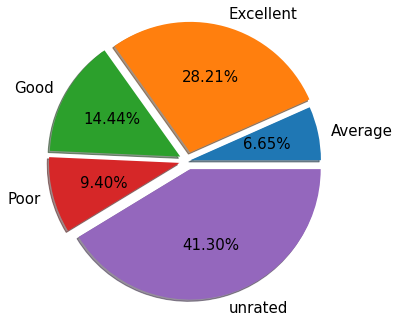

In [71]:
explode = [0.03,0.1,0.1,0.1,0.1] # To slice the perticuler section
textprops = {"fontsize":15} # Font size of text in pie chart
 
dfnew1["sentiment"].plot.pie(radius = 1.5,autopct = "%0.2f%%",shadow = True,explode = explode,textprops =textprops,legend=False,ylabel="")

In [72]:
dfnew2 = df2.groupby('movie_name')['sentiment'].value_counts().unstack().fillna(0)

<AxesSubplot:ylabel='movie_name'>

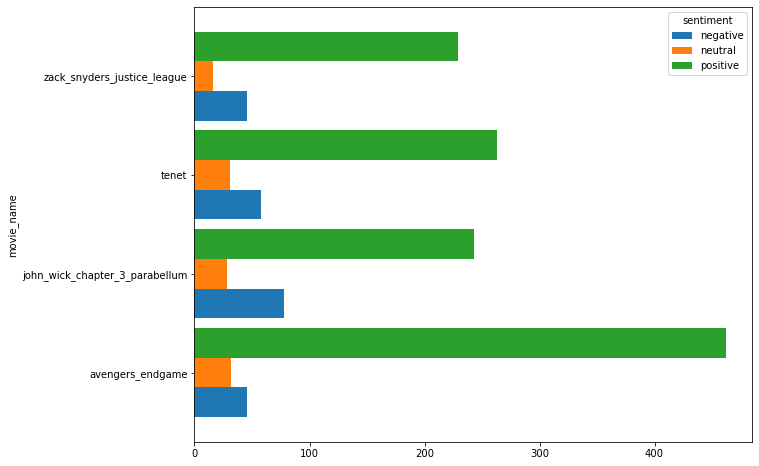

In [73]:
dfnew2.plot(kind='barh', stacked=False, figsize=(10,8), width=0.9  )

In [74]:
dfnew3 = df2.groupby('movie_name')['rating_sentiment'].value_counts().unstack().fillna(0)

<AxesSubplot:ylabel='movie_name'>

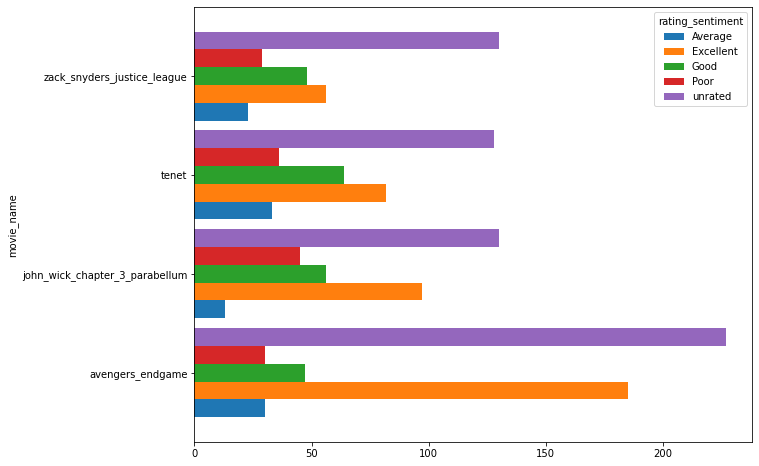

In [75]:
dfnew3.plot(kind='barh', stacked=False, figsize=(10,8), width=0.9 )

In [76]:
c = df2.iloc[1]

In [77]:
c["movie_name"]

'zack_snyders_justice_league'

In [78]:
df2.head(3)

,movie_name,name,review,date,sentiment,rating_out_of_10,rating_sentiment
0,zack_snyders_justice_league,Matt Lynch,"Ultimately, that this even exists is almost re...","June 6, 2021",neutral,0.0,unrated
1,zack_snyders_justice_league,Andrew Dex,The current DC Extended Universe can be a bit ...,"May 20, 2021",negative,6.0,Good
2,zack_snyders_justice_league,Sarah Marrs,While Zack Snyder's Justice League is unquesti...,"May 12, 2021",positive,0.0,unrated


In [79]:
pos_str = []
negative_str = []
neutral_str = []
s =len(df1)
for i in range(0,s):
    data = df1.iloc[i]
    s_ment = data["sentiment"]
    s_review = data["review"]
    if s_ment == "positive":
        pos_str.append(s_review)
    elif s_ment == "negative":
        negative_str.append(s_review)
    elif s_ment == "neutral":
        neutral_str.append(s_review)

In [80]:
#total_data = pos_str+negative_str

In [81]:
# count = [total_data.count(i) for i in attribute_list]
# attribute_list_count = {}
# for i in attribute_list:
#     attribute_list_count[i] = total_data.count(i)
#         # print('attribute _list count --',attribute_list_count)
# dict1 = {}
# if (len(attribute_list) >= 10):
#     attribute_list = attribute_list[:10]
# else:
#     pass
# for i in attribute_list:
# # dict1[i] = (whole_neg_data.count(i) / attribute_list_count[i], whole_pos_data.count(i) / attribute_list_count[i])
#     dict1[i] = (negative_str.count(i), pos_str.count(i))
#     dict1["count"] = [total_data.count(i) for i in attribute_list]

In [82]:
adjectives_pos = []
adjectives_neg = []
adjectives_neu = []
for i in pos_str:
    sentence = i
    token = nltk.word_tokenize(sentence)
    for i in token:
        x = nltk.pos_tag([i])
        if (x[0][1] == "JJ" or x[0][1] == "JJS" ) :
            adjectives_pos.append(i)
            
for i in negative_str:
    sentence = i
    token = nltk.word_tokenize(sentence)
    for i in token:
        x = nltk.pos_tag([i])
        if (x[0][1] == "JJ" or x[0][1] == "JJS" ) :
            adjectives_neg.append(i)

for i in neutral_str:
    sentence = i
    token = nltk.word_tokenize(sentence)
    for i in token:
        x = nltk.pos_tag([i])
        if (x[0][1] == "JJ" or x[0][1] == "JJS" ) :
            adjectives_neg.append(i)